In [37]:
%pip install -Uqq fastai ipywidgets timm

Note: you may need to restart the kernel to use updated packages.


In [4]:
from fastai.vision.all import untar_data, URLs, ImageDataLoaders, get_image_files, Resize, aug_transforms, vision_learner, error_rate, models

import torch 
torch.cuda.empty_cache()
torch.cuda.is_available()

True

Using from_name_re to use a regex pattern to 

In [3]:
path = untar_data(URLs.PETS)
dls = ImageDataLoaders.from_name_re(path, get_image_files(path/'images'), pat=r'(.+)_\d+.jpg$', item_tfms=Resize(256), batch_tfms=aug_transforms(size=256, min_scale=0.7), bs=32)
path

Path('/root/.fastai/data/oxford-iiit-pet')

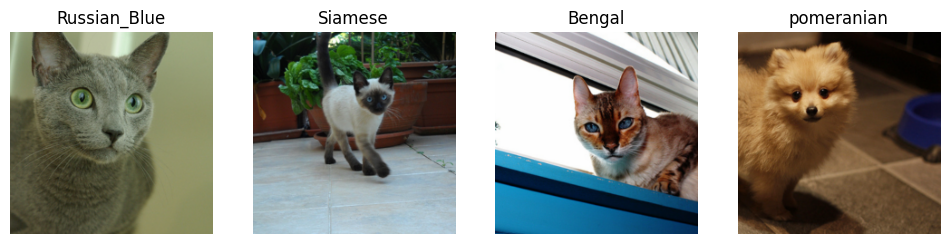

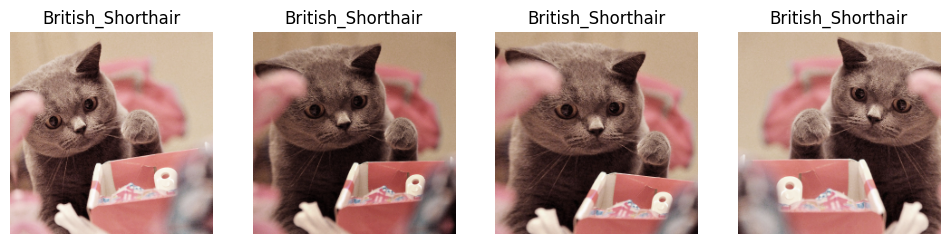

In [15]:
dls.train.show_batch(max_n=4, nrows=1)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

In [17]:
learn = vision_learner(dls,  models.resnet18, metrics=error_rate)
learn.fine_tune(2)
torch.cuda.empty_cache()

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:07<00:00, 6.28MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.107878,0.417184,0.134641,00:41


epoch,train_loss,valid_loss,error_rate,time
0,0.620548,0.328575,0.103518,00:47
1,0.410947,0.248066,0.079838,00:53


In [8]:
learn.export('model.pkl')
learn.save('model')

Path('/root/.fastai/data/oxford-iiit-pet/models/model.pth')